# Cyber Security Salaries Analysis

In the ever-evolving landscape of the cyber security industry, understanding the variables that impact employee salaries is crucial for organizations to maintain competitiveness and for individuals to make informed career decisions. This data analysis project aims to dissect the multifaceted relationship between factors such as experience level, employment type, job title, remote work ratio, and employee residence, and their collective influence on salary outcomes.

Utilizing a rich dataset that spans various roles within the cybersecurity domain—ranging from Information Security Officers to Application Security Engineers—we embark on a quantitative journey to unravel patterns and insights. Our preliminary visualizations hint at complex dynamics, such as the intriguing salary discrepancies among different employment types, particularly when dissecting the remote work ratio.

The outcome of this project aims to be a cornerstone for both employers to structure equitable and competitive compensation packages and for employees to understand the market value of their skills and experience. Through this analytical lens, we aspire to contribute to a more transparent and informed tech community.

## Initialization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inline visualizations
%matplotlib inline

# Set style
plt.style.use('ggplot')

# import data and create dataframe
df = pd.read_csv('salaries.csv')

# Get an overview of data frame
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Information Security Officer,160000,USD,160000,US,100,US,M
1,2023,EX,FT,Information Security Officer,100000,USD,100000,US,100,US,M
2,2023,SE,FT,Security Engineer,247250,USD,247250,US,0,US,M
3,2023,SE,FT,Security Engineer,160000,USD,160000,US,0,US,M
4,2023,SE,FT,Security Engineer,224250,USD,224250,US,0,US,M


In [6]:
# Get basic information and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4501 non-null   int64 
 1   experience_level    4501 non-null   object
 2   employment_type     4501 non-null   object
 3   job_title           4501 non-null   object
 4   salary              4501 non-null   int64 
 5   salary_currency     4501 non-null   object
 6   salary_in_usd       4501 non-null   int64 
 7   employee_residence  4501 non-null   object
 8   remote_ratio        4501 non-null   int64 
 9   company_location    4501 non-null   object
 10  company_size        4501 non-null   object
dtypes: int64(4), object(7)
memory usage: 386.9+ KB


The dataset demonstrates a high level of data integrity, with each column correctly formatted and populated with relevant values. This ensures that the data is primed for analysis without the need for extensive cleaning or preprocessing, thereby facilitating a streamlined and efficient analytical process.

In [10]:
# Returns all of the years used in this data
df['work_year'].unique()

array([2023, 2022, 2021, 2020], dtype=int64)

In [25]:
# Returns the the most common types of currencies
df['salary_currency'].value_counts().head(5)

salary_currency
USD    3998
EUR     198
GBP     155
CAD      59
AUD      19
Name: count, dtype: int64

In [12]:
# Returns the locations of the companies in this data
df['company_location'].unique()

array(['US', 'VN', 'SI', 'AU', 'CA', 'IN', 'GB', 'LV', 'NL', 'AT', 'IT',
       'DE', 'FI', 'ZA', 'MT', 'SG', 'EE', 'ES', 'FR', 'PL', 'JP', 'CZ',
       'SE', 'MY', 'PH', 'PT', 'IE', 'GR', 'CH', 'DK', 'NG', 'HR', 'HU',
       'AE', 'PY', 'CY', 'BR', 'BW', 'CL', 'RO', 'AQ', 'AX', 'MX', 'IL',
       'PK', 'NO', 'RU', 'ID', 'KE', 'RS', 'AR', 'NZ', 'BE', 'UM', 'LU',
       'SA', 'AF', 'TR'], dtype=object)

In [23]:
# Returns the top five locations
df['company_location'].value_counts().head(5)

company_location
US    3847
GB     177
CA     125
DE      49
AU      46
Name: count, dtype: int64

In [13]:
# Returns the ratios of remote employees in each role
df['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

In [17]:
# Returns the counts of each ratio of remote employees
df['remote_ratio'].value_counts()

remote_ratio
0      2312
100    1879
50      310
Name: count, dtype: int64

In [18]:
# Returns the counts of each employment type, 'FT' = Full Time, 'PT' = Part Time, 'CT' = Contract
# 'FL' = Freelance
df['employment_type'].value_counts()

employment_type
FT    4470
PT      15
CT      12
FL       4
Name: count, dtype: int64

In [24]:
# Returns all of the job titles in our dataset
df['job_title'].value_counts().head(10)

job_title
Security Engineer               1761
Security Analyst                 273
DevSecOps Engineer               237
Cyber Security Analyst           165
Security Architect               118
Penetration Tester               115
Security Researcher              103
Information Security Analyst      87
Compliance Analyst                80
Information Security Officer      79
Name: count, dtype: int64

This preliminary analysis reveals that our dataset encompasses a diverse array of cybersecurity professionals, spanning the period from 2020 to 2023. Predominantly, these professionals are engaged in full-time, on-site employment, with a significant concentration in the United States.


## Exploratory Data Analysis

### Overview of Salary Distribution

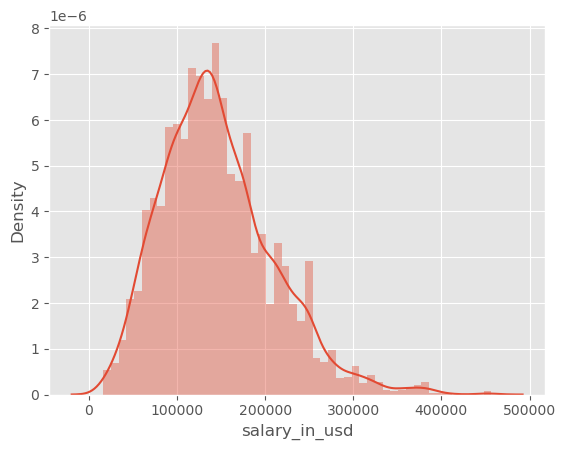

In [7]:
#Create a plot that shows salaries in USD and a KDE for frequency of salary
sns.distplot(df['salary_in_usd'], bins=50);

The histogram overlaid with a kernel density estimate (KDE) provides a visual interpretation of salary distribution among cybersecurity professionals. The concentration of data towards the lower end of the salary spectrum indicates that a larger number of professionals earn within a modest range. There appears to be a tail extending towards the higher salary values, suggesting that while fewer in number, there is a segment of the workforce that commands significantly higher earnings. This could reflect variations in pay due to factors such as job role complexity, industry experience, or regional economic conditions. The KDE curve accentuates the overall distribution shape, highlighting the skewness towards lower salaries with fewer instances of high salary outliers.

### Salaries By Company Size

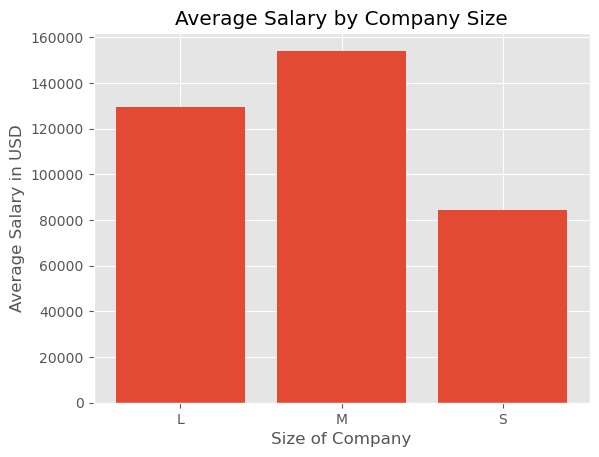

In [40]:
# Group the data by 'company_size' and calculate the mean salary for each group
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_company_size.index, avg_salary_by_company_size.values)

# Set the labels and title
ax.set_xlabel('Size of Company')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Company Size')

# Show the plot
plt.show()

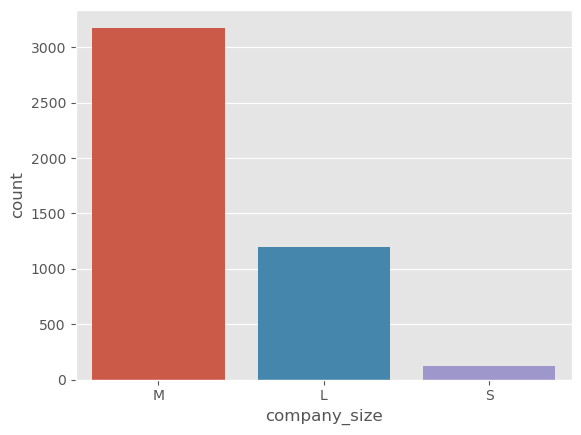

In [15]:
# Create a plot showing the counts of each company size
sns.countplot(x='company_size', data=df);

The provided bar charts reveal salary trends and company size distribution in the cybersecurity industry. Medium-sized companies top the average salary offering, surpassing both large and small firms, indicative of their competitive remuneration strategies. Additionally, this sector is predominantly made up of medium-sized enterprises.

This pattern may stem from several reasons: medium-sized firms often need specialized skills and have the financial leeway to pay well, unlike their smaller counterparts. They may also use higher pay to distinguish themselves from larger corporations, which have economies of scale but might offer less competitive salaries. These companies might be compensating for a less prominent market presence or benefits package with higher salaries. They could also be operating in niche markets with a scarcity of the required expertise, or they might have a leaner structure that places a premium on strategic roles.

### 2.2 Salaries By Years

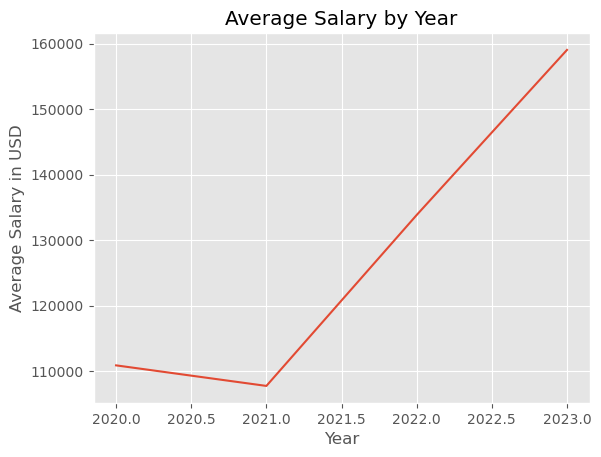

In [46]:
# Group the data by 'work_year' and calculate the mean salary for each group
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.plot(avg_salary_by_year.index, avg_salary_by_year.values)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Year')

# Show the plot
plt.show()

The "Average Salary by Year" chart illustrates a consistent rise in average cybersecurity salaries from 2020 to 2023. This growth can be attributed to a confluence of factors:

Inflation: With the cost of living climbing, salaries often adjust upwards to preserve the workers' purchasing power.

Market Demand: Cybersecurity's landscape is rapidly expanding, fueling a competitive market for qualified experts, which tends to push salaries upward.

Economic Recovery: Post-2020, the rebound from economic downturns like the COVID-19 pandemic could result in increased salary allocations.

Cyber Threats Awareness: As cyber threats intensify, the critical role of cybersecurity professionals is more recognized, potentially leading to salary hikes.

Remote Work Influence: The pivot to remote work has broadened the talent market, possibly enabling professionals to negotiate better salaries.

These increases likely stem from a complex interplay of global economic conditions, industry-specific demands, technological shifts, and labor market dynamics specific to cybersecurity.

### 2.3 Salaries By Employment Type

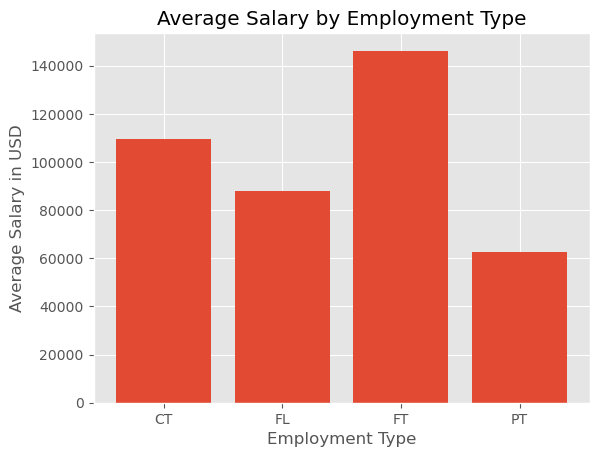

In [47]:
# Group the data by 'employment_type' and calculate the mean salary for each group
avg_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_employment_type.index, avg_salary_by_employment_type.values)

# Set the labels and title
ax.set_xlabel('Employment Type')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Employment Type')

# Show the plot
plt.show()

The chart illustrates salary comparisons across employment types, with full-time roles leading in average salary, followed by contract work, and part-time roles trailing. This is anticipated due to factors like:

Comprehensive Benefits: Full-time roles typically include benefits that augment overall compensation, alongside greater job security.

Skill and Role Requirements: Full-time positions often demand higher skills or specialization, which is compensated accordingly.

Inconsistent Work in Contracting: While contract rates may be high, the lack of continuous work and absence of full-time benefits can lower average annual earnings.

Employer Investment: Full-time employees, due to their longer-term commitment, might receive higher pay.

Negotiation Leverage: Full-time positions may offer more scope for salary negotiation and career progression, influencing average salaries.

Such trends are reflective of the broader job market dynamics, with specific salaries varying by industry, location, job function, and the individual’s qualifications and experience.

### 2.4 Salaries By Experience Level

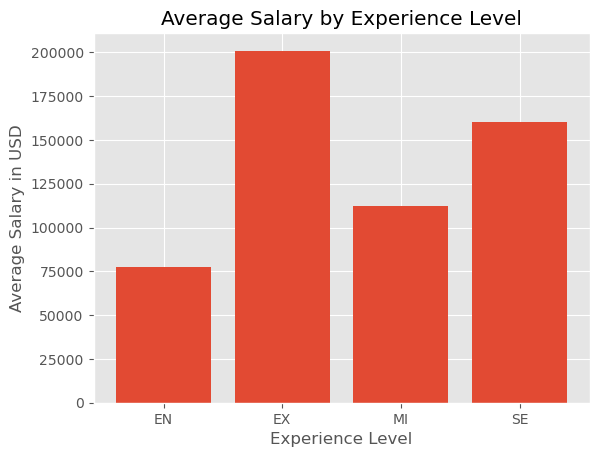

In [53]:
# Group the data by 'experience_level' and calculate the mean salary for each group
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_experience.index, avg_salary_by_experience.values)

# Set the labels and title
ax.set_xlabel('Experience Level')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Experience Level')

# Show the plot
plt.show()

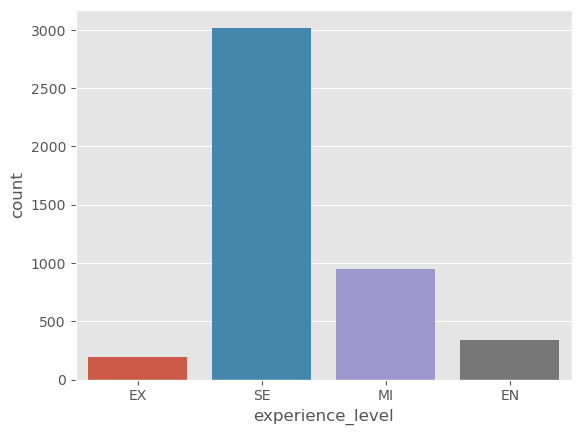

In [12]:
# Create a plot to show counts of experience levels
sns.countplot(x='experience_level', data=df);

The bar chart titled "Average Salary by Employment Type," shows average salaries for several categories of employment experience: Entry-level (EN), Mid-level (MI), Expert (EX), and Senior-level (SE). It can also be seen in the count plot that most of our data consists of senior level professionals. These charts indicate that most cyber security careers are senior-level which have the highest average salary, followed by mid-level employees, with entry-level employees having the lowest average salary.

This pattern is generally expected for several reasons:

Experience and Skill Accumulation: Senior-level employees typically have a greater accumulation of skills and experience, which often leads to higher salaries. As employees progress in their careers, they tend to take on more complex tasks and greater responsibilities that warrant higher pay.

Market Value and Negotiation Power: With experience comes a better understanding of the market value of one's skills and often greater negotiation power regarding salary. Senior-level employees may also have a proven track record that they can leverage in salary discussions.

Professional Network and Reputation: Over time, individuals build a professional network and reputation that can lead to better job opportunities and higher salary offers. Senior professionals often have an extensive network they can tap into for new opportunities that pay well.

Role and Impact: Senior roles are typically more strategic with a wider scope of influence within an organization, which can justify higher compensation due to the larger impact on the company’s success.

### 2.5 Salaries by Remote Ratio

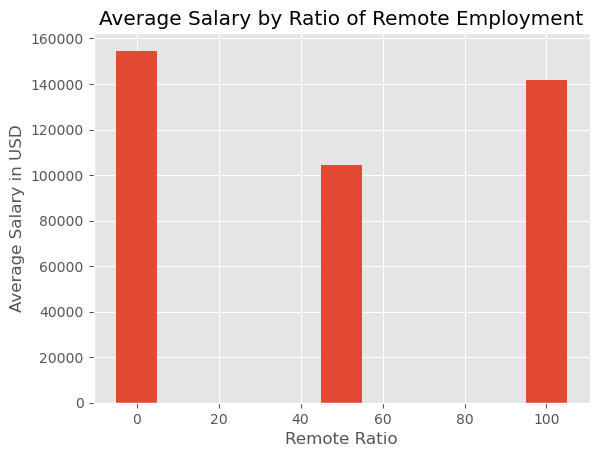

In [3]:
# Group the data by 'remote_ratio' and calculate the mean salary for each group
avg_salary_by_rr = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the bar chart using the grouped data
ax.bar(avg_salary_by_rr.index, avg_salary_by_rr.values, width=10)

# Set the labels and title
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('Average Salary in USD')
ax.set_title('Average Salary by Ratio of Remote Employment')

# Show the plot
plt.show()

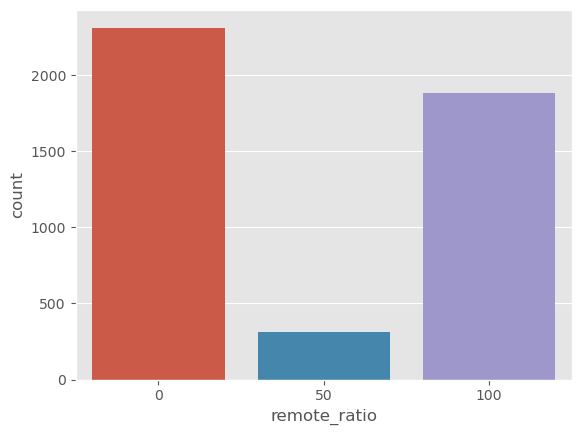

In [26]:
sns.countplot(x='remote_ratio', data=df);

The "Average Salary by Remote Ratio" bar chart displays average salaries by the ratio of employees that are working in a remote environment. The categories include fully remote, fully on-site, and a mix of both. The bar representing companies with a mixture of remote and on-site employees shows the lowest average salary.

Several factors could contribute to this observed difference in average salary:

Job Roles and Industry: Companies that offer a mix of remote and on-site work might be in industries or have roles that traditionally pay less. For example, they might have a larger number of entry-level or support positions which tend to have lower salaries.

Cost of Living Adjustments: Companies that have mixed remote policies might adjust salaries based on the cost of living where the employee resides. If many employees live in areas with a lower cost of living, the average salary across the company might be lower.

Company Size and Resources: Smaller companies or startups often have a mix of remote and on-site workers due to space limitations and may not have the resources to pay as high salaries as larger, more established companies.

Flexibility Trade-Off: Some employees might be willing to accept a lower salary in exchange for the flexibility of being able to work both remotely and on-site.

Operational Costs: Companies with mixed employment types might have higher operational costs due to maintaining both office space and remote capabilities, potentially leaving less budget available for salaries.

### 2.6 Salaries By Job Title

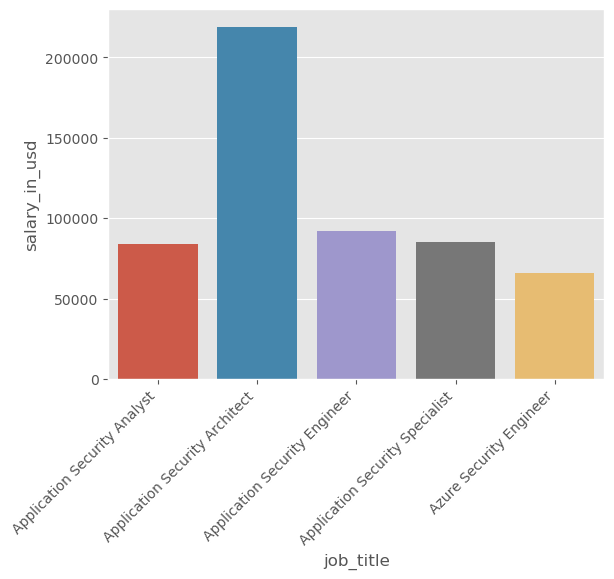

In [24]:
# Group the data by 'job_title' and calculate the mean salary for each group
avg_salary_by_jt = df.groupby('job_title')['salary_in_usd'].mean().reset_index().head(5)

# Create a plot to show the different salaries by job titles
sns.barplot(x='job_title', y='salary_in_usd', data=avg_salary_by_jt);

#Rotate Labels
plt.xticks(rotation=45, ha='right')

# Adjust label size
plt.xticks(fontsize=10);

The bar chart "Salaries By Job Title" demonstrates average salaries across the most common cybersecurity roles within this dataset. The Application Security Architect role commands the highest average salary, indicative of the critical importance and expertise required for designing secure applications. Following are Application Security Engineers and Information Security Analysts, reflecting their pivotal roles in developing and maintaining secure systems. Roles like Application Security Specialist and Azure Security Engineer also feature prominently, with notable average salaries.

These job titles are common in the dataset likely because they represent core functions within the cybersecurity domain. The prominence of application security roles underscores the industry's focus on securing software against the increasing threats in today's digital landscape. Moreover, the mention of a cloud-specific role like Azure Security Engineer highlights the industry's shift towards cloud platforms and the need for specialists in securing cloud environments.

The high salaries for these roles could be attributed to the specialized skills required, the importance of protecting sensitive data, and the potential financial and reputational impact of security breaches. As cybersecurity threats become more sophisticated, the demand for skilled professionals in these positions increases, which can drive up average salary figures. The data likely reflects the current market demand for these roles and the value placed on them by employers.

# Conclusion

This comprehensive analysis of cybersecurity salaries has revealed critical insights into the factors influencing compensation across the industry. From examining the impact of employment type to the role of company size, this data-driven approach has illuminated the multifaceted nature of salary determinants.

I discovered that full-time employees enjoy the highest average salaries, emphasizing the value placed on long-term commitment and the comprehensive benefits that these positions typically offer. Meanwhile, contract work, despite its flexibility, tends to offer less financial security, as evidenced by its lower average compensation.

Further, this study highlighted the premium placed on medium-sized companies, which often provide competitive salaries to attract and retain top talent. These companies balance the agility of smaller entities with the resources of larger organizations, creating a sweet spot for cybersecurity professionals seeking advancement without the bureaucracy of large-scale operations.

This analysis also noted the importance of job roles, with positions demanding specialized skills or higher risk responsibilities commanding greater pay. Remote work ratios also significantly influenced salaries, indicating a complex relationship between work flexibility and compensation.

As the cybersecurity landscape evolves, this analysis should serve as a beacon for both employers structuring equitable compensation packages and professionals navigating their career trajectories. With an eye toward future trends and emerging roles, we anticipate that the insights gleaned here will remain relevant, empowering stakeholders to make informed decisions in this dynamic field.

In conclusion, this project has provided a valuable lens through which we can view the current state of cybersecurity compensation. It lays the groundwork for ongoing research and offers a benchmark for the industry as it continues to grow and adapt to new challenges and technologies.